In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random # for generating random mazes
from queue import Queue # for BFS implementation
import heapq # for A* algorithm
from collections import deque # for BFS implementation


## Maze Generation
* https://en.wikipedia.org/wiki/Maze_generation_algorithm
* The maze is generated using the Randomized DFS : Iterative Backtracking Algorithm using stack

### Iterative implementation (with stack)
A disadvantage of the recursive approach is a large depth of recursion – in the worst case, the routine may need to recur on every cell of the area being processed, which may exceed the maximum recursion stack depth in many environments.

As a solution, the same backtracking method can be implemented with an explicit stack, which is usually allowed to grow much bigger with no harm.

1. Choose the initial cell, mark it as visited and push it to the stack
2. While the stack is not empty
  1. Pop a cell from the stack and make it a current cell
  2. If the current cell has any neighbours which have not been visited
    1.  Push the current cell to the stack
    2.  Choose one of the unvisited neighbours
    3.  Remove the wall between the current cell and the chosen cell
    4.  Mark the chosen cell as visited and push it to the stack

In [4]:
# Maze Generation using Recursive Backtracking
def generate_maze(size):
    maze = np.ones((size, size), dtype=int) # 1 represents walls

    # Set outer walls to be solid
    maze[0, :] = 1
    maze[:, 0] = 1
    maze[size-1, :] = 1
    maze[:, size-1] = 1

    stack = [(1, 1)]
    maze[1, 1] = 0
    # Directions for maze generation
    # x,y
    directions = [(0, 2), (2, 0), (0, -2), (-2, 0)]

    while stack:
        x, y = stack[-1]
        random.shuffle(directions) # random directtions provide
        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if 1 <= nx < size-1 and 1 <= ny < size-1 and maze[nx, ny] == 1:
                maze[nx - dx//2, ny - dy//2] = 0 # Remove wall between current and next
                maze[nx, ny] = 0 # Mark cell as part of the path
                stack.append((nx, ny))
                break
        else:
            stack.pop()

    # Ensure the start and end positions are open
    maze[1, 1] = 0  # Start
    maze[size-2, size-2] = 0  # End

    return maze


## Ploting the Maze
This function `plot_maze` visualizes the maze with the following features:

* Walls in black (where maze[x, y] == 1).

* Paths in white (where maze[x, y] == 0).

* Visited cells in gray if provided.

* Solution path in red if provided.

* Start point in green at [1, 1].

* End point in purole at [size-2, size-2].

It uses matplotlib to plot the image, making it easy to visualize the maze.

In [5]:
# Plotting the Maze
def plot_maze(maze, path=None, visited=None):
    size = maze.shape[0]
    img = np.ones((size, size, 3))  # RGB image

    for x in range(size):
        for y in range(size):
            if maze[x, y] == 1:
                img[x, y] = [0, 0, 0]  # Walls in black
            else:
                img[x, y] = [1, 1, 1]  # Paths in white

    if visited:
        for x, y in visited:
            img[x, y] = [0.5, 0.5, 0.5]  # Visited cells in gray

    if path:
        for x, y in path:
            img[x, y] = [1, 0, 0]  # Solution path in red

    img[1, 1] = [0, 1, 0]  # Start in green
    img[size-2, size-2] = [0.5, 0, 0.5]  # End in purple

    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis('off')
    plt.show()


Testing the Maze generation ( `generate_maze` )and Maze Plotting (`plot_maze`)

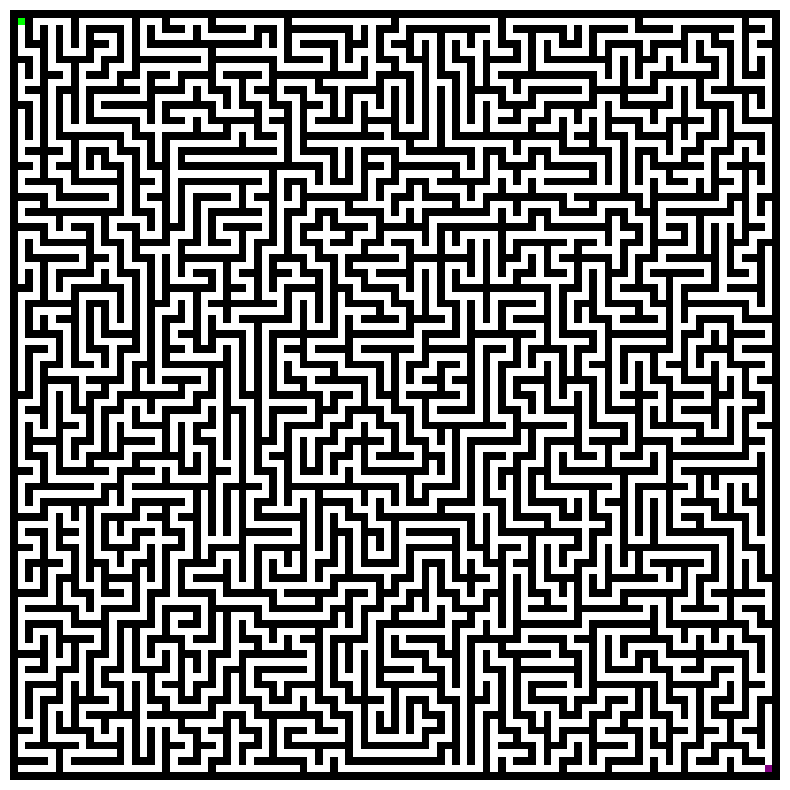

In [7]:
# Running the project

# make the size n+1 to make the maze perfect else there might not be any wall on the right and the bottom due to the randomized nature or out maze generating algorithm

size = 101

# generating the maze
maze = generate_maze(size)

# plotting the maze
plot_maze(maze)

# top left corner in green is the starting position at [1,1]
# bottom right corner in purple is the ending position at [size-2,size-2]


# BFS

* https://en.wikipedia.org/wiki/Breadth-first_search

* BFS (breath-first search) an algorithm that explores all possible paths level by level, ensuring that the shortest path is found.

* It expands nodes by exploring all neighbors before moving to the next level.


* Extra memory, usually a ***queue***, is needed to keep track of the child nodes that were encountered but not yet explored.

  ### Pseudocode :



```
 1  procedure BFS(G, root) is
 2      let Q be a queue
 3      label root as explored
 4      Q.enqueue(root)
 5      while Q is not empty do
 6          v := Q.dequeue()
 7          if v is the goal then
 8              return v
 9          for all edges from v to w in G.adjacentEdges(v) do
10              if w is not labeled as explored then
11                  label w as explored
12                  w.parent := v
13                  Q.enqueue(w)
```




In [8]:
# BFS to solve the maze
def bfs(maze):
    size = maze.shape[0]
    start = (1, 1)
    end = (size - 2, size - 2)

    # Directions for movement (right, down, left, up)
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]

    queue = deque([start])
    visited = set()
    visited.add(start)
    parent_map = {}

    while queue:
        x, y = queue.popleft()
        if (x, y) == end:
            path = []
            while (x, y) != start:
                path.append((x, y))
                x, y = parent_map[(x, y)]
            path.append(start)
            path.reverse()
            return path, visited, len(visited)

        # Explore neighbors
        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if 0 <= nx < size and 0 <= ny < size and maze[nx, ny] == 0 and (nx, ny) not in visited:
                visited.add((nx, ny))
                parent_map[(nx, ny)] = (x, y)
                queue.append((nx, ny))
    # the function returns the path i.e., the solution if discovered else [] , the visited cells and the length of the visited cells
    return [], visited, len(visited)

Testing the BSF Algorithm

2797


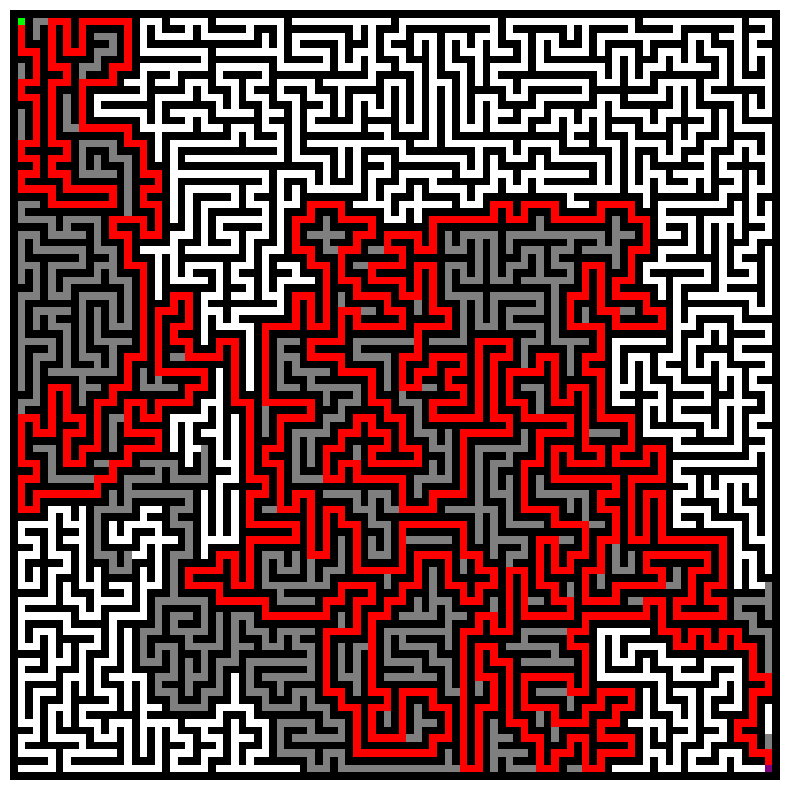

In [14]:
# Solve the maze using BFS
bfs_path, bfs_visited, len_b = bfs(maze)
print(len_b) # length of the visited cells
# Plot the maze and the solution path
plot_maze(maze, bfs_path, bfs_visited)

# the gray represents the noded that the algorith has visited
# the red path the final path that is taken by teh algorithm while solving the maze


# DFS
* https://en.wikipedia.org/wiki/Depth-first_search

* Depth-first search (DFS) is an algorithm for traversing or searching tree or graph data structures.

* The algorithm starts at the root node (selecting some arbitrary node as the root node in the case of a graph) and explores as far as possible along each branch before backtracking.

* Extra memory, usually a ***stack***, is needed to keep track of the nodes discovered so far along a specified branch which helps in backtracking of the graph.


* its an algorithm that explores as deep as possible along each branch before backtracking. It may go down long paths and check each possibility without considering the optimal path.

  ### Pseudocode :



```
 1 procedure DFS_iterative(G, v) is
 2    let S be a stack
 3    S.push(v)
 4    while S is not empty do
 5        v = S.pop()
 6        if v is not labeled as discovered then
 7            label v as discovered
 8            for all edges from v to w in G.adjacentEdges(v) do
 9                if w is not labeled as discovered then
10                   S.push(w)

```



In [10]:

# DFS to solve the maze
def dfs(maze):
    size = maze.shape[0]
    start = (1, 1)
    end = (size - 2, size - 2)

    # Directions for movement (right, down, left, up)
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]

    # Stack for DFS
    stack = [(start, [start])]
    visited = set()
    visited.add(start)

    path = None

    while stack:
        (x, y), current_path = stack.pop()

        # Check if we've reached the end
        if (x, y) == end:
            path = current_path
            break

        # Explore all possible neighbors
        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if 0 <= nx < size and 0 <= ny < size and maze[nx, ny] == 0 and (nx, ny) not in visited:
                visited.add((nx, ny))
                stack.append(((nx, ny), current_path + [(nx, ny)]))

    return path, visited, len(visited)  # the function returns the path i.e., the solution if discovered else [] , the visited cells and the length of the visited cells


Testing DFS Algorithm

4703


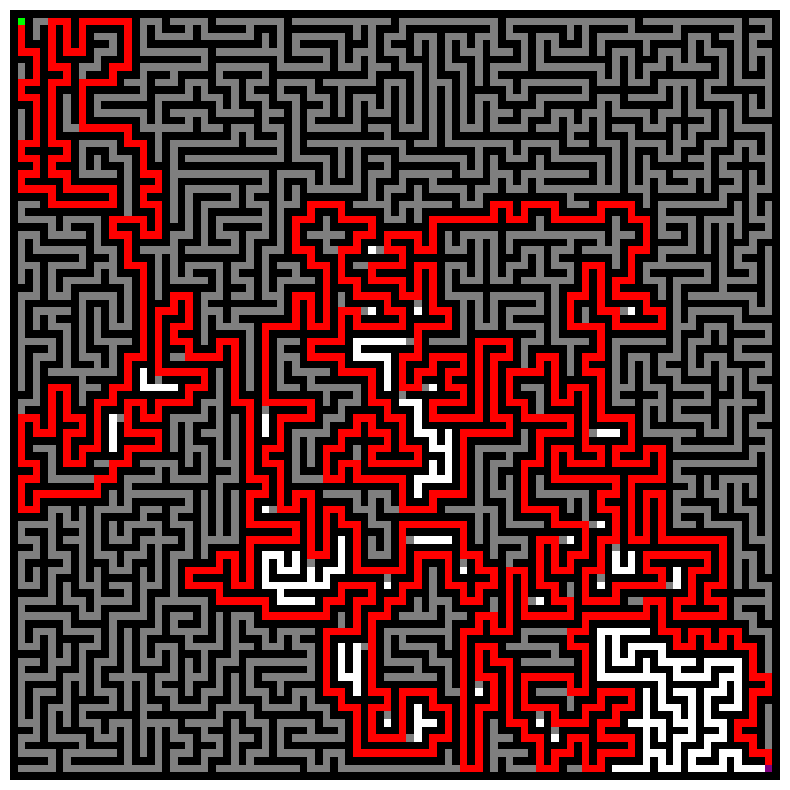

In [11]:
# Solve the maze using BFS
dfs_path,dfs_visited,len_d = dfs(maze)
print(len_d)
# Plot the maze and the solution path
plot_maze(maze, dfs_path,dfs_visited)


# A*
*  https://en.wikipedia.org/wiki/A*_search_algorithm
* its a pathfinding algorithm that combines the benefits of BFS and heuristic search. It uses a heuristic function to prioritize exploring the most promising paths, ensuring the shortest and most optimal path is found efficiently.
* Typical implementations of A* use a ***priority queue*** to perform the repeated selection of minimum (estimated) cost nodes to expand.
* A* needs to determine which of its paths to extend. It does so based on the cost of the path and an estimate of the cost required to extend the path all the way to the goal. Specifically, A* selects the path that minimizes



```
f(n) = g(n) + h(n)
```
* where n is the next node on the path,
* g(n) is the cost of the path from the start node to n,
* h(n) is a heuristic function that estimates the cost of the cheapest path from n to the goal.
 ### Pseudocode


```
 1 function reconstruct_path(cameFrom, current)
 2     total_path := {current}
 3     while current in cameFrom.Keys:
 4        current := cameFrom[current]
 5        total_path.prepend(current)
 6     return total_path
```
 A* finds a path from start to goal.
 h is the heuristic function. h(n) estimates the cost to reach goal from node n.
```
 7  function A_Star(start, goal, h)
    // The set of discovered nodes that may need to be (re-)expanded. Initially, only the start node is known. This is usually implemented as a min-heap or priority queue rather than a hash-set.
 8    openSet := {start}

    // For node n, cameFrom[n] is the node immediately preceding it on the cheapest path from the start to n currently known.
 9     cameFrom := an empty map

    // For node n, gScore[n] is the currently known cost of the cheapest path from start to n.
10     gScore := map with default value of Infinity
11     gScore[start] := 0

    // For node n, fScore[n] := gScore[n] + h(n). fScore[n] represents our current best guess as to,  how cheap a path could be from start to finish if it goes through n.
12     fScore := map with default value of Infinity
13     fScore[start] := h(start)

14     while openSet is not empty
        // This operation can occur in O(Log(N)) time if openSet is a min-heap or a priority queue
15         current := the node in openSet having the lowest fScore[] value
16         if current = goal
17             return reconstruct_path(cameFrom, current)

18         openSet.Remove(current)
19         for each neighbor of current
            // d(current,neighbor) is the weight of the edge from current to neighbor,  tentative_gScore is the distance from start to the neighbor through current
20             tentative_gScore := gScore[current] + d(current, neighbor)
21             if tentative_gScore < gScore[neighbor]
                // This path to neighbor is better than any previous one. Record it!
22                  cameFrom[neighbor] := current
23                  gScore[neighbor] := tentative_gScore
24                  fScore[neighbor] := tentative_gScore + h(neighbor)
25                  if neighbor not in openSet
26                     openSet.add(neighbor)

    // Open set is empty but goal was never reached
27      return failure
```





In [12]:
# Manhattan Distance Heuristic (used in A*)
def manhattan_distance(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

# A* to solve the maze
def a_star(maze):
    size = maze.shape[0]
    start = (1, 1)
    end = (size - 2, size - 2)

    # Directions for movement (right, down, left, up)
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]

    # Priority queue for A* (using heapq to implement a min-heap)
    open_list = []
    heapq.heappush(open_list, (0 + manhattan_distance(start, end), 0, start, []))  # (f, g, position, path)
    visited = set()
    visited.add(start)

    while open_list:
        f, g, current, path = heapq.heappop(open_list)

        # If we reached the end, return the path
        if current == end:
            return path + [current], visited, len(visited)

        # Explore all possible neighbors
        for dx, dy in directions:
            nx, ny = current[0] + dx, current[1] + dy
            if 0 <= nx < size and 0 <= ny < size and maze[nx, ny] == 0 and (nx, ny) not in visited:
                visited.add((nx, ny))
                new_g = g + 1  # Cost to move to the neighbor is 1
                new_f = new_g + manhattan_distance((nx, ny), end)
                heapq.heappush(open_list, (new_f, new_g, (nx, ny), path + [current]))

    return [], visited, len(visited) # the function returns the path i.e., the solution if discovered else [] , the visited cells and the length of the visited cells

Testing A* Algorithm

2638


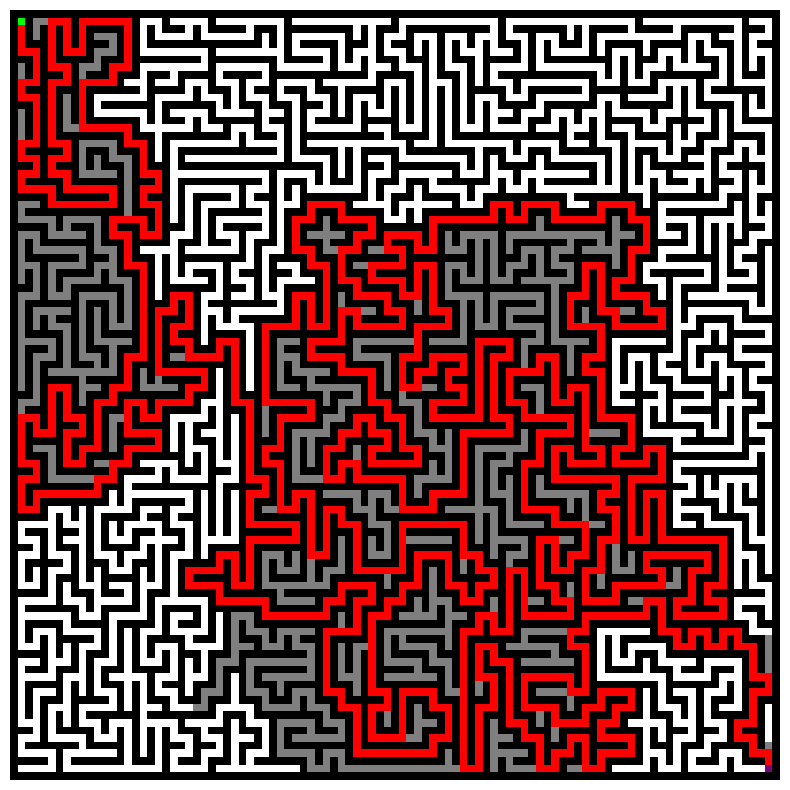

In [15]:
# Solve the maze using A*
a_path, a_visited, len_a = a_star(maze)

# Plot the maze, the solution path, and the visited cells
print(len_a)
plot_maze(maze,a_path,a_visited)

## Observations
1. **Highest nodes visited is in DFS :** the DFS goes through most nodes taking more and more time with increase in size of the maze

2. **Least nodes visited is in A* Algo :** the A* goes through least nodes taking less time and making the most optimal path that is the shortest path

3. **Least nodes visited is in BFS :** the BSF goes through  nodes level by level taking less time than DFS and making the an optimal path that may be the shortest path



## Performance Analysis

In [16]:
import time # for time anylisis

## Measuring performance of BSF, DFS and A* wrt time and nodes visited

The ` compare_algorithms_over_sizes ` function evaluates and compares the performance of three maze-solving algorithms—BFS, DFS, and A*—on mazes of increasing sizes.


### How It Works:
1. It generates mazes of different sizes (from `start_size` to `end_size` with a step size of `step`).

2. It runs each algorithm (BFS, DFS, and A*) on the generated mazes.

3. It measures:

  * **Execution time** (how long the algorithm takes to find a solution).

  * **Nodes visited** (how many nodes the algorithm explored).

4. It plots two graphs:

  * **Time vs Maze Size**: Shows how execution time increases with maze size for each algorithm.

  * **Nodes Visited vs Maze Size**: Shows how many nodes each algorithm visits as maze size increases.

Running for size 100...
Running for size 150...
Running for size 200...
Running for size 250...
Running for size 300...
Running for size 350...
Running for size 400...
Running for size 450...
Running for size 500...


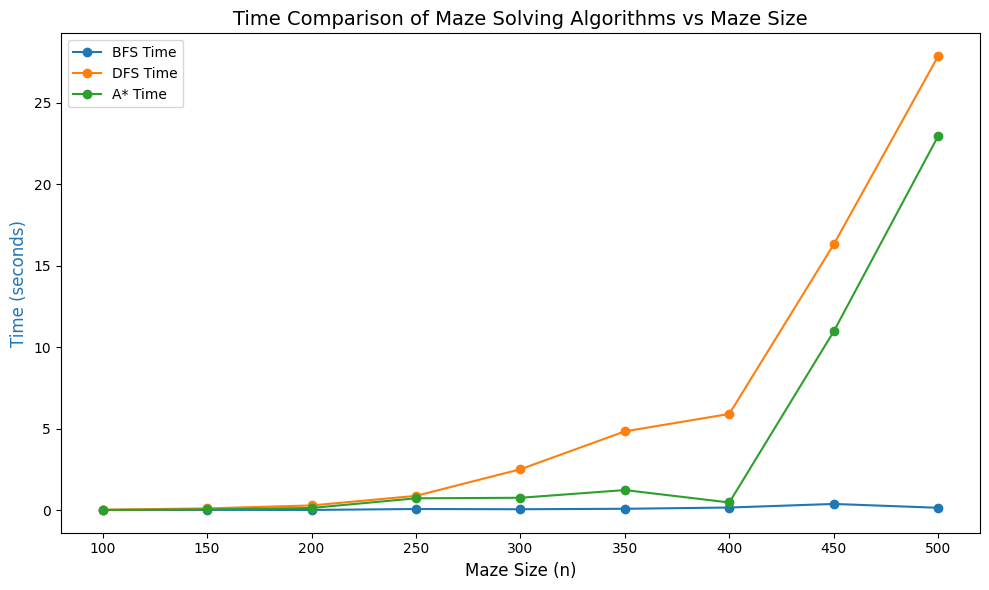

A* nodes :  [3186, 5969, 11461, 28213, 26858, 36209, 21195, 82447, 117684]
BFS nodes :  [2495, 8183, 6307, 29955, 22099, 32523, 60183, 82535, 55979]
DFS nodes :  [4274, 10045, 18564, 28847, 43239, 59987, 71230, 98282, 116440]


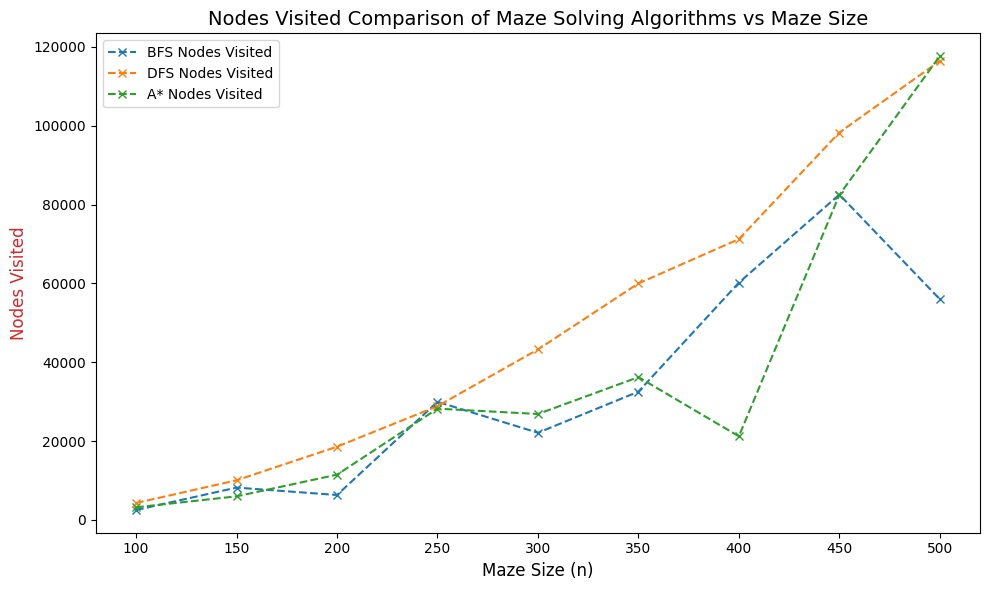

In [17]:
# Function to compare performance of all three algorithms
def measure_algorithm_performance(algorithm, size):
    """Function to measure the time and nodes visited for a given algorithm on a maze of size `size`."""
    maze = generate_maze(size+1)

    # Measure time and nodes visited for the given algorithm
    start_time = time.time()
    path, v, visited = algorithm(maze)
    elapsed_time = time.time() - start_time

    return elapsed_time, visited

def compare_algorithms_over_sizes(start_size=10, end_size=50, step=10):
    """Function to compare BFS, DFS, and A* on different maze sizes."""
    sizes = list(range(start_size, end_size + 1, step))

    bfs_times = []
    dfs_times = []
    a_star_times = []

    bfs_nodes = []
    dfs_nodes = []
    a_star_nodes = []

    # Run the algorithms for different maze sizes
    for size in sizes:
        print(f"Running for size {size}...")

        # Measure BFS performance
        bfs_time, bfs_visited = measure_algorithm_performance(bfs, size)
        bfs_times.append(bfs_time)
        bfs_nodes.append(bfs_visited)

        # Measure DFS performance
        dfs_time, dfs_visited = measure_algorithm_performance(dfs, size)
        dfs_times.append(dfs_time)
        dfs_nodes.append(dfs_visited)

        # Measure A* performance
        a_star_time, a_star_visited = measure_algorithm_performance(a_star, size)
        a_star_times.append(a_star_time)
        a_star_nodes.append(a_star_visited)

   # Plotting Time
    plt.figure(figsize=(10, 6))
    plt.plot(sizes, bfs_times, color='tab:blue', marker='o', label="BFS Time")
    plt.plot(sizes, dfs_times, color='tab:orange', marker='o', label="DFS Time")
    plt.plot(sizes, a_star_times, color='tab:green', marker='o', label="A* Time")
    plt.xlabel('Maze Size (n)', fontsize=12)
    plt.ylabel('Time (seconds)', color='tab:blue', fontsize=12)
    plt.title('Time Comparison of Maze Solving Algorithms vs Maze Size', fontsize=14)
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

    # Plotting Nodes Visited
    # print("DFS nodes visisted = ",len_d)
    # print("BFS nodes visisted = ",len_b)
    # print("A* nodes visisted = ",len_a)
    print("A* nodes : ",a_star_nodes)
    print("BFS nodes : ",bfs_nodes)
    print("DFS nodes : ",dfs_nodes)
    plt.figure(figsize=(10, 6))
    plt.plot(sizes, bfs_nodes, color='tab:blue', linestyle='--', marker='x', label="BFS Nodes Visited")
    plt.plot(sizes, dfs_nodes, color='tab:orange', linestyle='--', marker='x', label="DFS Nodes Visited")
    plt.plot(sizes, a_star_nodes, color='tab:green', linestyle='--', marker='x', label="A* Nodes Visited")
    plt.xlabel('Maze Size (n)', fontsize=12)
    plt.ylabel('Nodes Visited', color='tab:red', fontsize=12)
    plt.title('Nodes Visited Comparison of Maze Solving Algorithms vs Maze Size', fontsize=14)
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

# Run the comparison function for different maze sizes
compare_algorithms_over_sizes(start_size=100, end_size=500, step=50)

## Summary Comparison:

### 1. **DFS:**
- **Nodes Visited:** Highest
- **Time Taken:** Longest
- **Description:** DFS tends to waste time by going down deep paths and backtracking, resulting in many nodes being visited unnecessarily.

### 2. **BFS:**
- **Nodes Visited:** Moderate
- **Time Taken:** Moderate
- **Description:** BFS finds the shortest path but tends to visit many nodes, especially in larger mazes, as it explores all possibilities level by level.

### 3. **A*:**
- **Nodes Visited:** Least
- **Time Taken:** Least
- **Description:** A* is the most efficient algorithm because it uses heuristics to guide the search towards the goal, resulting in the least number of nodes being visited and the fastest pathfinding.
